In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath

вариант = len('МезенцевГлебВладимирович')%30
вариант

24

[](img/nm0.png)
[](img/nm1.png)

## Задание 2 (2.7.4)
![](pic/nm1.png)
![](pic/nm2.png)

In [32]:
def f(x):
    return np.log(2*x-x**2)+2-np.sqrt(x)

def df(x):
    return (2-2*x)/(2*x-x**2) - 1/(2*np.sqrt(x))

def d2f(x):
    return((x**(5/2.)-4*x**(3/2.)-8*x**2+16*x+4*np.sqrt(x)-16)/(4*(x-2)**2)*x**2)

def Newton(f, df, x0, tol = 1e-5, maxiter = 100):
    x = x0
    for i in range(maxiter):
        dx = -f(x)/df(x)
        if abs(dx) < tol:
            return x,i
        else:
            x += dx
    return x, NAN
    
def Newton_simplified(f, df, x0, tol = 1e-5, maxiter = 100):
    x = x0
    for i in range(maxiter):
        dx = -f(x)/df(x0)
        if abs(dx) < tol:
            return x,i
        else:
            x += dx
    return x, NAN

def bisection(f, a, b, tol = 1e-4, maxiter = 100):
    if f(a)*f(b) > 0:
        print('f(a) and f(b) should have different signs')
        return(np.NAN, np.NAN)
    for i in range(maxiter):
        dx = b-a
        if abs(b-a) < tol:
            return a, i
        else:
            x = (a+b) / 2.
            if f(x)*f(a) < 0:
                b = x
            else:
                a = x
    return a, NAN

def secants(f, a, b, tol = 1e-5, maxiter = 100):
    x = b
    x_prev = a
    for i in range(maxiter):
        dx = - ((x - x_prev) / (f(x) - f(x_prev)) * f(x))
        if abs(dx) < tol:
            return x, i
        else:
            x_prev = x
            x += dx
    return x, NAN

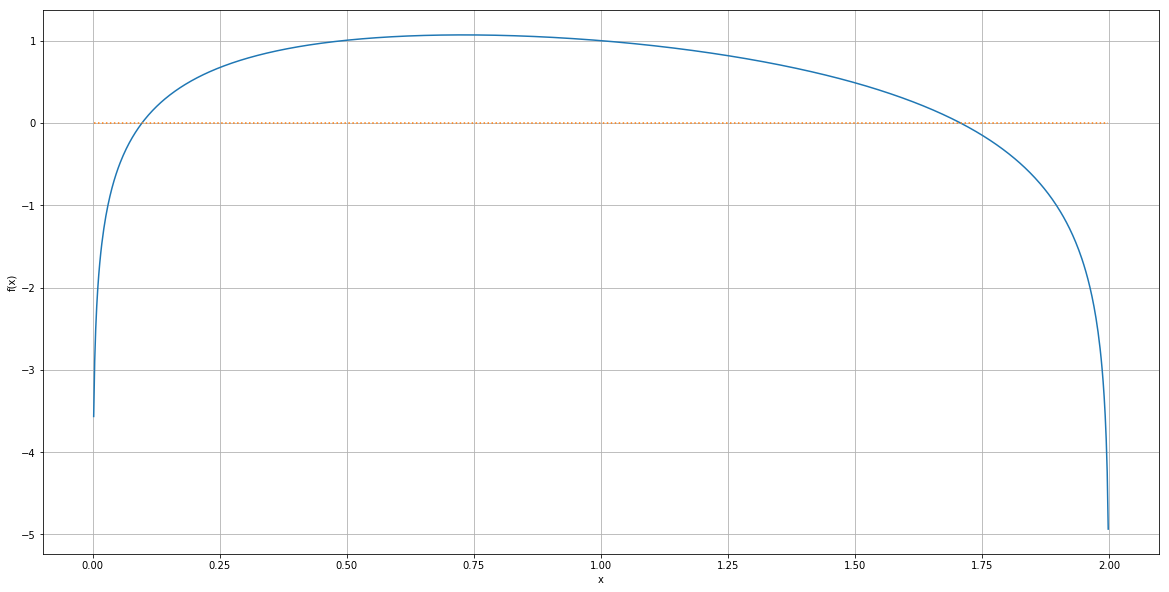

In [3]:
x = np.linspace(0, 2, 1000, endpoint=False)[1:]
y = [f(i) for i in x]
y1 = [d2f(i) for i in x]
zero = np.zeros(len(x))
plt.figure(figsize=(20,10))

plt.plot(x, y)
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, zero, linestyle = ':');

## Видим 2 действительных корня

In [4]:
eps_values = [1e-5, 1e-12]

## Найдём численные решения с плохим начальным приближением:

In [33]:
intervals = [[0.1, 1],[1, 1.99]]
x0_vals = [0.01, 1.99]

for eps in eps_values:    
    x_newt = [Newton(f, df, x0, eps) for x0 in x0_vals]
    x_newt_s = [Newton_simplified(f, df, x0, eps, 1000) for x0 in x0_vals]
    x_sec= [secants(f, interval[0], interval[1], eps) for interval in intervals]
    print('Epsilon = '+str(eps)+':')
    for i in [0,1]:
        print(' x'+str(i+1)+'≈ '+str(np.mean([x_newt[i][0], x_newt_s[i][0], x_sec[i][0]]).round(5))+':')
        print(' number of iterations to convergence: ')
        print('  Newton:'+str(x_newt[i][1]))
        print('  Newton simplified:'+str(x_newt_s[i][1]))
        print('  Secants:'+str(x_sec[i][1]))
        print('\n')
    

Epsilon = 1e-05:
 x1≈ 0.09709:
 number of iterations to convergence: 
  Newton:5
  Newton simplified:67
  Secants:7


 x2≈ 1.7073:
 number of iterations to convergence: 
  Newton:6
  Newton simplified:190
  Secants:10


Epsilon = 1e-12:
 x1≈ 0.09713:
 number of iterations to convergence: 
  Newton:7
  Newton simplified:245
  Secants:9


 x2≈ 1.7072:
 number of iterations to convergence: 
  Newton:7
  Newton simplified:683
  Secants:11




## Найдём численные решения с хорошим начальным приближением (сначала сделаем несколько шагов методом бисекции):

In [34]:
intervals = [[0.001, 0.25],[1.5, 1.75]]

x_bis = [bisection(f, i[0], i[1], 1e-2) for i in intervals]

for eps in eps_values:    
    x_newt = [Newton(f, df, x0[0], 1e-10) for x0 in x_bis]
    x_newt_s = [Newton_simplified(f, df, x0[0], 1e-10) for x0 in x_bis]
    x_sec= [secants(f, x0[0] - 1e-2, x0[0] + 1e-2, 1e-10) for x0 in x_bis]
    print('Epsilon = '+str(eps)+':')
    for i in [0,1]:
        print('  x'+str(i+1)+' ≈ '+str(np.mean([x_newt[i][0], x_newt_s[i][0], x_sec[i][0]]).round(5))+':')
        print('  number of iterations to convergence: ')
        print('    Newton:'+str(x_newt[i][1]))
        print('    Newton simplified:'+str(x_newt_s[i][1]))
        print('    Secants:'+str(x_sec[i][1]))
        print('\n')

Epsilon = 1e-05:
  x1 ≈ 0.09713:
  number of iterations to convergence: 
    Newton:3
    Newton simplified:5
    Secants:4


  x2 ≈ 1.7072:
  number of iterations to convergence: 
    Newton:3
    Newton simplified:5
    Secants:4


Epsilon = 1e-12:
  x1 ≈ 0.09713:
  number of iterations to convergence: 
    Newton:3
    Newton simplified:5
    Secants:4


  x2 ≈ 1.7072:
  number of iterations to convergence: 
    Newton:3
    Newton simplified:5
    Secants:4




## Задание 3 (2.8.3)
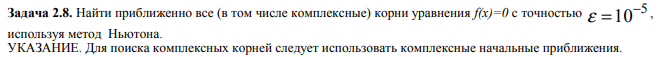


In [57]:
def g(x):
    return x**4-2.7*x**3+x-1

def dg(x):
    return 4*x**3-8.1*x**2+1

def Newton_complex(f, df, x0, tol = 1e-5, maxiter = 100):
    x = x0;
    for i in range(maxiter):
        dx = - f(x)/df(x)
        if np.abs(dx) < tol:
            if np.abs(x.imag) < tol:
                return x.real, i
            else:
                return x, i
        else:
            x += dx
    if np.abs(x.imag) < 1e-5:
        return x.real, np.NAN
    else:
        return x, np.NAN

In [79]:
x0_vals = [10, -10, complex(0, -10), complex(0, 10)]

for i, x0 in enumerate(x0_vals):
    x_newt_c = Newton_complex(g, dg, x0)
    print('  x'+str(i+1)+' ≈ '+str(round(x_newt_c[0].real, 5) + round(x_newt_c[0].imag, 5) * 1j)+':')
    print('  number of iterations to convergence = '+str(x_newt_c[1]))
    print('\n')

  x1 ≈ (2.60942+0j):
  number of iterations to convergence = 9


  x2 ≈ (-0.80128+0j):
  number of iterations to convergence = 11


  x3 ≈ (0.44593-0.5286j):
  number of iterations to convergence = 11


  x4 ≈ (0.44593+0.5286j):
  number of iterations to convergence = 11


